,0,1,2,3,4,5,6,7,8,9,10
0,inf,28.895504,16.920068,68.938239,128.675927,174.271658,98.496704,96.519183,77.296243,92.320054,77.319351
1,28.895504,inf,20.453092,88.668697,150.922919,197.157216,109.701279,121.025374,104.357673,120.171954,85.566207
2,16.920068,20.453092,inf,68.299678,130.472786,176.704177,91.558352,100.752597,85.083423,101.437418,68.348036
3,68.938239,88.668697,68.299678,inf,62.689466,109.024899,40.712248,38.444358,40.121481,56.372504,36.647920
4,128.675927,150.922919,130.472786,62.689466,inf,46.337956,67.561085,35.158278,61.582868,60.926700,85.226656
5,174.271658,197.157216,176.704177,109.024899,46.337956,inf,108.231356,78.318172,102.496365,96.030090,129.031469
6,98.496704,109.701279,91.558352,40.712248,67.561085,108.231356,inf,64.254673,77.724803,91.309120,24.993796
7,96.519183,121.025374,100.752597,38.444358,35.158278,78.318172,64.254673,inf,26.670130,30.811392,71.761308
8,77.296243,104.357673,85.083423,40.121481,61.582868,102.496365,77.724803,26.670130,inf,17.677853,76.686021
9,92.320054,120.171954,101.437418,56.372504,60.926700,96.030090,91.309120,30.811392,17.677853,inf,92.989099


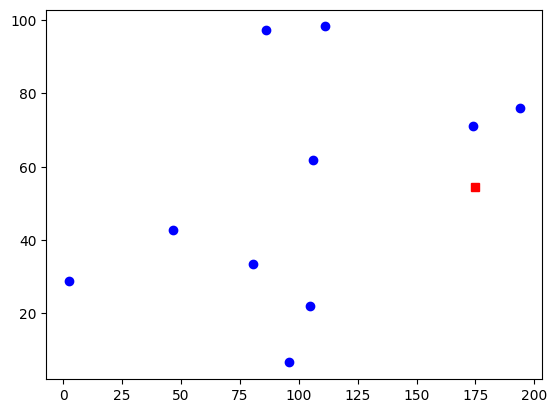

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random
rnd.seed(8)
n = 10 # clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100
plt.plot(xc[0], yc[0], c='r', marker = 's')
plt.scatter(xc[1:],yc[1:],c='b')
# set of clients
import pandas as pd


N = [i for i in range(1,n+1)]
V = [0] + N
# connecting every point to every point
A = [(i,j) for i in V for j in V if i!=j]
# Generating distances from each point
c = {(i,j): np.hypot(xc[i]-xc[j],yc[i]-yc[j]) for i,j in A}
c[(0,0)] = np.inf
c[(1,1)] = np.inf
c[(2,2)] = np.inf
c[(3,3)] = np.inf
c[(4,4)] = np.inf
c[(5,5)] = np.inf
c[(6,6)] = np.inf
c[(7,7)] = np.inf
c[(8,8)] = np.inf
c[(9,9)] = np.inf
c[(10,10)] = np.inf

distances = [[c.get((i,j), 0) for j in range(11)] for i in range(11)]

dist_matrix = pd.DataFrame(distances, columns=V, index=V)

dist_matrix


In [15]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.core.problem import ElementwiseProblem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.constraints.as_penalty import ConstraintsAsPenalty

def constraintCheck (X):                                                                                            # What does this do?
    isConnected = np.all(np.sum(X,axis=1)==1)
    isDiagonal = True
    isC0 = True
    isC1 = True
    isC2 = True
    isC3 = True
    isC4 = True
    isC5 = True
    isC6 = True
    isC7 = True
    isC8 = True
    isC9 = True
    isC10 = True
    # for loop to check for diagonals
    for row in range (X.shape[0]):
        if X[row][row] == 1:
            isDiagonal = False

    checked = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    done = False
    col = 0
    num = 0
    while( not done ) :
        current = col
        for row in range(0, 11) :
            if X[col][row] == 1 :
                col = row
                checked[col] = 1
                num += 1
            if current == col or num == 3: done = True
    # print(checked)
    isContinuous = np.all(checked)
    # print(isContinuous)

    if checked[0] == 0:
        isC0 = False
        
    if checked[1] == 0:
        isC1 = False
        
    if checked[2] == 0:
        isC2 = False
        
    if checked[3] == 0:
        isC3 = False
        
    if checked[4] == 0:
        isC4 = False
        
    if checked[5] == 0:
        isC5 = False
        
    if checked[6] == 0:
        isC6 = False
        
    if checked[7] == 0:
        isC7 = False
        
    if checked[8] == 0:
        isC8 = False
        
    if checked[9] == 0:
        isC9 = False
        
    if checked[10] == 0:
        isC10 = False
        

    return [isConnected, isDiagonal, isContinuous, isC0, isC1, isC2, isC3, isC4, isC5, isC6, isC7, isC8, isC9, isC10]


class VehicleRouter(ElementwiseProblem):
    def __init__(self, dist_matrix):
        super().__init__(n_var=121, n_obj=1, n_ieq_constr=24, xl=0, xu=1)                                           #how do each of these variables works, is n_var mean theres a solution for each different point or what?, if I were to add the contraint that each node could only be visited once, where would it go? or is that already in here somewhere.
        self.dist_matrix=dist_matrix
# How to represent the route as the x
# Make each row the individual of the population
# each column is a given gene
# out[F] is how good each solution is, one row per individual 
# and one column how good it is (total distance)
# Inherit ElementwiseProblem to evaulate individual solutions, 
# should be easier than matrix stuff
    def _evaluate(self, x, out, *args, **kwargs):

        # reshaping x to be a matrix of 11 by 11
        x=x.reshape ((11,11))

        # creating a dist matrix mask
        # if a route is 1 then it takes the distance value
        # from the dist matrix
        dist_mask = np.array(np.where(x==1, dist_matrix, 0))

        # sums all the routes taken by the algorithm
        sum_matrix = np.sum(dist_mask*1000000)

        # the measure of corectness is via the F dictionary
        out["F"] = sum_matrix

        # setting up constraints
        # the diagonal of the matrix has distance values of zero
        # since they are points (0,0) (1,1) ... (10,10)
        # the algorithm should not choose these as it will go nowhere
        isDiagonal = True

        # for loop to check for diagonals
        for row in range (x.shape[0]):
            if x[row][row] == 1:
                isDiagonal = False
        
        # this constraint makes sure that the route is connected
        # the sum of each solution column is calculated
        # if the column sum is greater than 0 than that means its connected
        # np.all is checking if all elements are true
        checked = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        done = False
        col = 0
        num = 0
        isC0 = True
        isC1 = True
        isC2 = True
        isC3 = True
        isC4 = True
        isC5 = True
        isC6 = True
        isC7 = True
        isC8 = True
        isC9 = True
        isC10 = True
        while( not done ) :
            current = col
            for row in range(0, 11) :
                if x[col][row] == 1 :
                    col = row
                    checked[col] = 1
                    num += 1
                if current == col or num == 3: done = True

        #print(checked)
        #isContinuous = np.all(checked)
        # print(isContinuous)

        if checked[0] == 0:
            isC0 = False
            
        if checked[1] == 0:
            isC1 = False
            
        if checked[2] == 0:
            isC2 = False
            
        if checked[3] == 0:
            isC3 = False
            
        if checked[4] == 0:
            isC4 = False
            
        if checked[5] == 0:
            isC5 = False
            
        if checked[6] == 0:
            isC6 = False
            
        if checked[7] == 0:
            isC7 = False
            
        if checked[8] == 0:
            isC8 = False
            
        if checked[9] == 0:
            isC9 = False
            
        if checked[10] == 0:
            isC10 = False
        

        isConnected = (np.sum(x,axis=1)==1)
        out["G"] = np.concatenate([[isDiagonal <=0] , [False], isConnected <=0, [isC0 <= 0], [isC1 <= 0], [isC2 <= 0], [isC3 <= 0], [isC4 <= 0], [isC5 <= 0], [isC6 <= 0], [isC7 <= 0], [isC8 <= 0], [isC9 <= 0], [isC10 <= 0]])

problem = ConstraintsAsPenalty(VehicleRouter(dist_matrix), penalty = 10000000000.0)

algorithm = GA(
    pop_size= 200,
    sampling=BinaryRandomSampling(),
    crossover=TwoPointCrossover(),
    mutation=BitflipMutation(),
    eliminate_duplicates=True)

res = minimize(problem,
            algorithm,
            ('n_gen', 200),
            verbose=False)

[[False  True False False False False False False False False False]
 [False False  True False False False False False False False False]
 [False False False  True False False False False False False False]
 [False False False False  True False False False False False False]
 [False False False False False  True False False False False False]
 [False False False False False False  True False False False False]
 [False False False False False False False  True False False False]
 [False False False False False False False False  True False False]
 [False False False False False False False False False  True False]
 [False False False False False False False False False False  True]
 [False False False False False False  True False False False False]]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True]


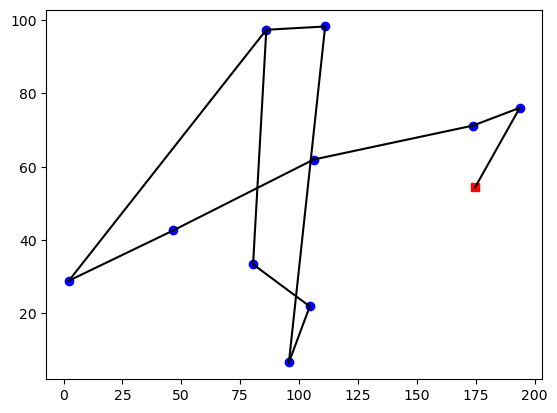

In [16]:
print(res.X.reshape((11,11)))
res.F
print(constraintCheck(res.X.reshape((11,11))))

rnd = np.random
rnd.seed(8)
n = 10 # clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100
plt.plot(xc[0], yc[0], c='r', marker = 's')
plt.scatter(xc[1:],yc[1:],c='b')
# plt.plot([xc[2], xc[1]], [yc[2], yc[1]], 'k-')
matrixX = res.X.reshape((11,11))
for i in range(matrixX.shape[0]):
    for j in range(matrixX.shape[1]):
        if matrixX[i, j] == 1:
            plt.plot([xc[i], xc[j]], [yc[i], yc[j]], 'k-')

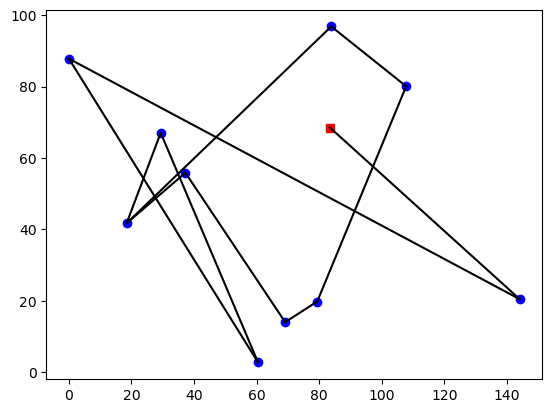

In [10]:
rnd = np.random
rnd.seed(1)
n = 10 # clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100
plt.plot(xc[0], yc[0], c='r', marker = 's')
plt.scatter(xc[1:],yc[1:],c='b')
# plt.plot([xc[2], xc[1]], [yc[2], yc[1]], 'k-')
matrixX = res.X.reshape((11,11))
for i in range(matrixX.shape[0]):
    for j in range(matrixX.shape[1]):
        if matrixX[i, j] == 1:
            plt.plot([xc[i], xc[j]], [yc[i], yc[j]], 'k-')
